# Microsoft Movie Analysis

**Author:** Shirley Muiruri
***

## Overview

This project analyzes the needs of Microsoft. We will use exploratory data analysis to generate insights to be used as a guide for Microsoft.


## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they do not know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.




## Data Understanding

Microsoft is looking to enter the movie industry and needs to understand what types of films are currently successful at the box office. The loaded datasets (from IMDb and Box Office Mojo) contain information about movie ratings, basic movie details (like title, year, genre, and runtime), and movie gross earnings (domestic and foreign).



In [4]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Here you run your code to explore the data
ratings = pd.read_csv('/content/imdb.title.ratings.csv.gz')
basics = pd.read_csv('/content/imdb.title.basics.csv.gz')
gross_earnings = pd.read_csv('/content/bom.movie_gross.csv.gz')

#Data Preparation

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
gross_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
gross_earnings.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#Data Merging

Merge the three datasets (ratings, basics, and movie_gross) based on common identifiers to create a unified dataset for analysis.

**Reasoning:** Merge the ratings and basics dataframes first.

In [12]:
merged_ratings_basics = pd.merge(ratings, basics, on='tconst', how='inner')
merged_ratings_basics.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


Merging the new dataset movie_ratings_basics with the gross_earnings dataset to form a new dataset.

In [13]:
merged_df = pd.merge(merged_ratings_basics, gross_earnings, left_on='primary_title', right_on='title', how='inner')
merged_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt7122852,5.1,7,Let Me In,Let Me In,2017,74.0,Horror,Let Me In,Over.,12100000.0,12000000,2010
3023,tt7315484,5.2,22399,The Silence,The Silence,2019,90.0,"Horror,Thriller",The Silence,MBox,100000.0,132000,2013
3024,tt8011712,7.4,54,The Past,The Past,2018,120.0,"Drama,Horror",The Past,SPC,1300000.0,9300000,2013
3025,tt9042690,7.6,43,The Negotiation,The Negotiation,2018,89.0,"Documentary,History,War",The Negotiation,CJ,111000.0,NaN,2018


# **Data cleaning**

Dealing with missing values

Task:

* Handle missing values and any other inconsistent data.
* Ensure data types are appropriate for analysis.

In [14]:
merged_df.isna()
#This returns a boolean df where missing values are True

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,False,False,False,False,False,False,False,False,False,False,False,False,False
3023,False,False,False,False,False,False,False,False,False,False,False,False,False
3024,False,False,False,False,False,False,False,False,False,False,False,False,False
3025,False,False,False,False,False,False,False,False,False,False,False,True,False


In [15]:
merged_df.isnull().sum()

,0
tconst,0
averagerating,0
numvotes,0
primary_title,0
original_title,0
start_year,0
runtime_minutes,47
genres,7
title,0
studio,3


Reasoning: Handle missing values in critical columns by imputing numerical columns with the mean and dropping rows with missing genre information.

In [16]:
# Fill missing domestic_gross and foreign_gross with the mean
merged_df['domestic_gross'] = merged_df['domestic_gross'].fillna(merged_df['domestic_gross'].mean())
merged_df['foreign_gross'] = merged_df['foreign_gross'].fillna(merged_df['foreign_gross'].mean())

TypeError: can only concatenate str (not "int") to str

**Reason for the error above:** The error indicates that the 'foreign_gross' column contains non-numeric data which is causing the mean calculation to fail. The next steps are:

To convert the foreign_gross column to numeric before calculating the mean.
Checking the data types for the columns with missing values

In [17]:
# Convert domestic_gross and foreign_gross to numeric, coercing errors
merged_df['domestic_gross'] = pd.to_numeric(merged_df['domestic_gross'], errors='coerce')
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'], errors='coerce')

# Check and convert data types - these should already be numeric after the coerce step
print("\nData types after conversion:")
print(merged_df[['runtime_minutes', 'domestic_gross', 'foreign_gross']].dtypes)


Data types after conversion:
runtime_minutes    float64
domestic_gross     float64
foreign_gross      float64
dtype: object


**Task:**

Filling the missing domestic_gross and foreign_gross column with mean
Drop the rows with missing genres
Confirm that all missing values have been handled for the relevant columns

In [18]:
# Fill missing domestic_gross and foreign_gross with the mean
merged_df['domestic_gross'] = merged_df['domestic_gross'].fillna(merged_df['domestic_gross'].mean())
merged_df['foreign_gross'] = merged_df['foreign_gross'].fillna(merged_df['foreign_gross'].mean())

# Drop rows where 'genres' is missing
merged_df = merged_df.dropna(subset=['genres'])
merged_df = merged_df.dropna(subset=['studio'])


# Confirm missing values are handled for relevant columns
print("Missing values after handling:")
print(merged_df[['runtime_minutes', 'genres', 'domestic_gross', 'foreign_gross', 'studio']].isnull().sum())

Missing values after handling:
runtime_minutes    45
genres              0
domestic_gross      0
foreign_gross       0
studio              0
dtype: int64


**Reasoning:** Handle missing values in runtime_minutes by filling in with the mean.

In [19]:
#fill missing values in runtime_minutes with mean
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].mean())
print(merged_df.isnull().sum())

tconst             0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64


#Droppig Columns

**Observation : **The column primary_title and title have the same information

**Solution :** Drop the title column

In [20]:
#remove repeating columns
merged_df = merged_df.drop(columns=['title'])
merged_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.000000,"Action,Adventure,Fantasy",LG/S,1.880000e+07,4.240000e+07,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.000000,Comedy,FoxS,2.160000e+07,8.870000e+05,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.000000,"Adventure,Animation,Drama",Shout!,3.064033e+07,3.400000e+06,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.000000,"Biography,Drama,Sport",Sony,7.560000e+07,3.460000e+07,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.000000,"Drama,Fantasy,Romance",WB,3.270000e+07,7.250000e+07,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt7122852,5.1,7,Let Me In,Let Me In,2017,74.000000,Horror,Over.,1.210000e+07,1.200000e+07,2010
3023,tt7315484,5.2,22399,The Silence,The Silence,2019,90.000000,"Horror,Thriller",MBox,1.000000e+05,1.320000e+05,2013
3024,tt8011712,7.4,54,The Past,The Past,2018,120.000000,"Drama,Horror",SPC,1.300000e+06,9.300000e+06,2013
3025,tt9042690,7.6,43,The Negotiation,The Negotiation,2018,89.000000,"Documentary,History,War",CJ,1.110000e+05,7.843093e+07,2018


Rename Column


In [21]:
#rename column year
merged_df = merged_df.rename(columns={'year': 'release_year'})
merged_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,release_year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.000000,"Action,Adventure,Fantasy",LG/S,1.880000e+07,4.240000e+07,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.000000,Comedy,FoxS,2.160000e+07,8.870000e+05,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.000000,"Adventure,Animation,Drama",Shout!,3.064033e+07,3.400000e+06,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.000000,"Biography,Drama,Sport",Sony,7.560000e+07,3.460000e+07,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.000000,"Drama,Fantasy,Romance",WB,3.270000e+07,7.250000e+07,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt7122852,5.1,7,Let Me In,Let Me In,2017,74.000000,Horror,Over.,1.210000e+07,1.200000e+07,2010
3023,tt7315484,5.2,22399,The Silence,The Silence,2019,90.000000,"Horror,Thriller",MBox,1.000000e+05,1.320000e+05,2013
3024,tt8011712,7.4,54,The Past,The Past,2018,120.000000,"Drama,Horror",SPC,1.300000e+06,9.300000e+06,2013
3025,tt9042690,7.6,43,The Negotiation,The Negotiation,2018,89.000000,"Documentary,History,War",CJ,1.110000e+05,7.843093e+07,2018


In [22]:
#save cleaned dataset as csv
merged_df.to_csv('merged_df.csv', index=False)

##ANALYSIS

**Exploratory Data Analysis**

**Task:**

* Analyze the distributions of key variables (ratings, runtime, gross earnings) and explore relationships between them.

* Visualize the data and interpret it.

**Reasoning:**

Generate descriptive statistics for the specified columns in the 'merged_df' DataFrame to understand their central tendency, dispersion, and shape of distribution



In [23]:
print(merged_df[['averagerating', 'runtime_minutes', 'domestic_gross', 'foreign_gross']].describe())


       averagerating  runtime_minutes  domestic_gross  foreign_gross
count    3017.000000      3017.000000    3.017000e+03   3.017000e+03
mean        6.459231       107.258748    3.060470e+07   7.846587e+07
std         1.009515        19.884464    6.655446e+07   1.078885e+08
min         1.600000         3.000000    1.000000e+02   6.000000e+02
25%         5.900000        94.000000    1.440000e+05   1.310000e+07
50%         6.600000       105.000000    2.000000e+06   7.843093e+07
75%         7.100000       118.000000    3.200000e+07   7.843093e+07
max         9.200000       272.000000    7.001000e+08   9.464000e+08




#Visualizations

**1: Create histograms to visualize the distributions of 'averagerating', 'runtime_minutes', 'domestic_gross', and 'foreign_gross' to understand their frequency distributions.**

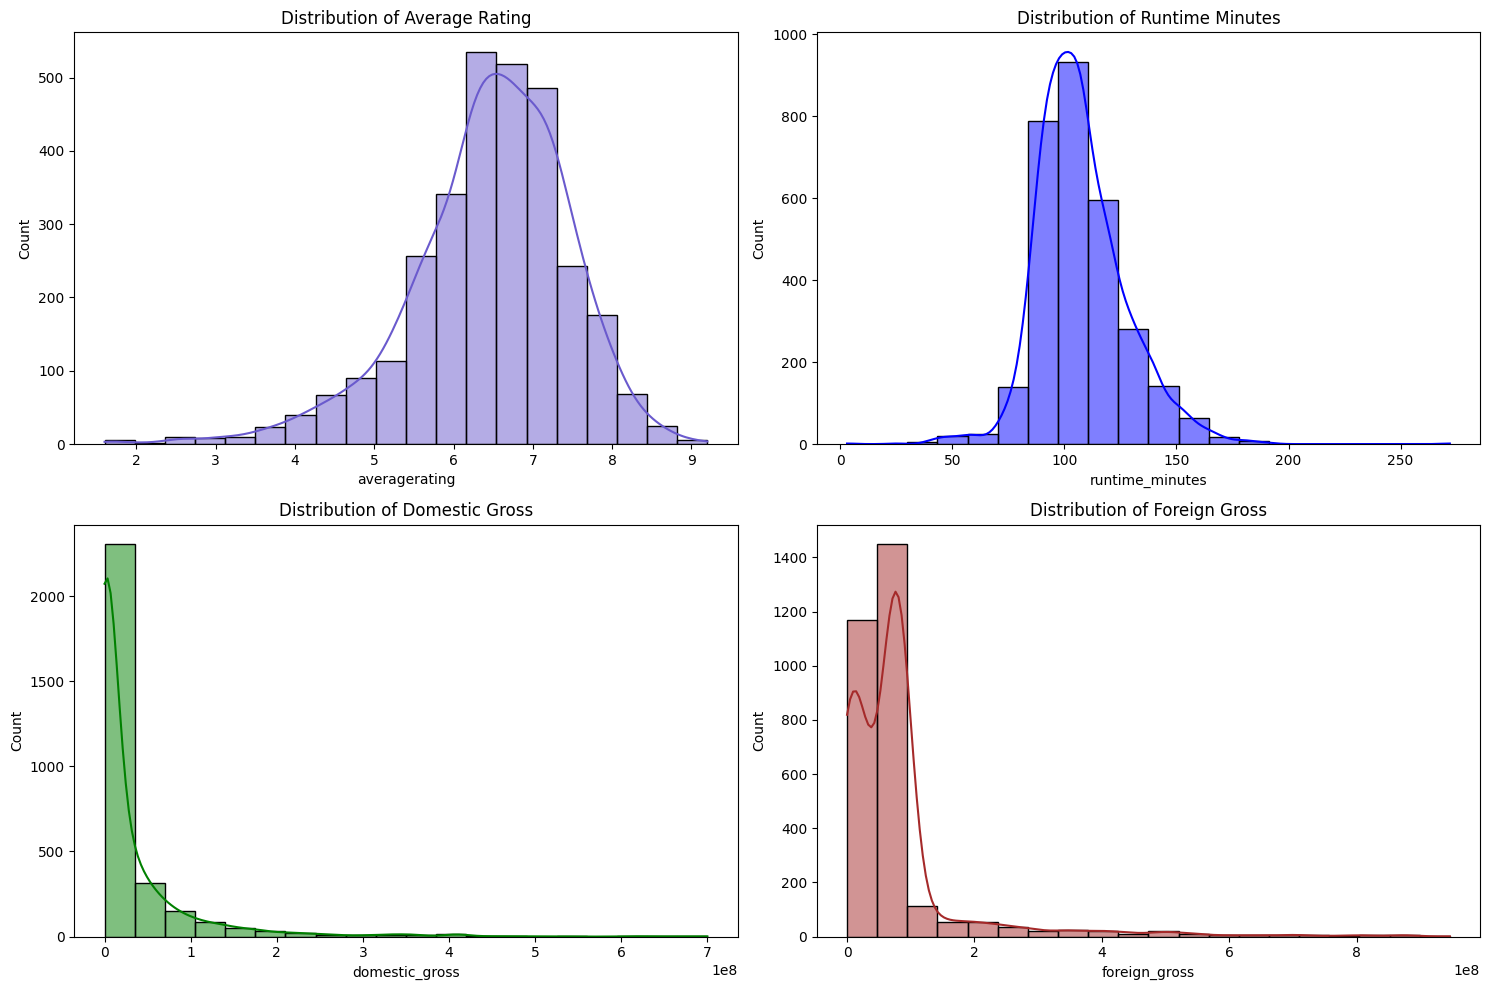

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(merged_df['averagerating'], ax=axes[0, 0], kde=True, bins=20, color='slateblue')
axes[0, 0].set_title('Distribution of Average Rating')
sns.histplot(merged_df['runtime_minutes'], ax=axes[0, 1], kde=True, bins=20, color= 'blue')
axes[0, 1].set_title('Distribution of Runtime Minutes')
sns.histplot(merged_df['domestic_gross'], ax=axes[1, 0], kde=True, bins=20, color='green' )
axes[1, 0].set_title('Distribution of Domestic Gross')
sns.histplot(merged_df['foreign_gross'], ax=axes[1, 1], kde=True, bins=20, color='brown')
axes[1, 1].set_title('Distribution of Foreign Gross')
plt.tight_layout()
plt.show()

**Interpretations from the Histograms**

* **Distribution of Average Rating:** The histogram shows a roughly normal distribution of average ratings, with most movies having an average rating between 5.5 and 7.5. There are fewer movies with very low or very high average ratings.

* **Distribution of Runtime Minutes:** The distribution of runtime minutes appears to be somewhat right-skewed, meaning there is a longer tail on the right side. This indicates that while most movies fall within a certain runtime range (likely around 90-120 minutes), there are some movies with significantly longer runtimes.

* **Distribution of Domestic Gross:** The histogram for domestic gross is highly right-skewed. This indicates that a large number of movies have relatively low domestic gross earnings, while a small number of outlier movies have very high domestic gross earnings. This is typical for box office data.

* **Distribution of Foreign Gross:** Similar to domestic gross, the histogram for foreign gross is also highly right-skewed. This shows that many movies have lower foreign earnings, and a few movies have exceptionally high foreign gross earnings. The spike near zero suggests a significant number of movies with very limited foreign release or success.

**2 : Create scatter plots to visualize the relationships between 'averagerating' and gross earnings, and between 'runtime_minutes' and gross earnings.**



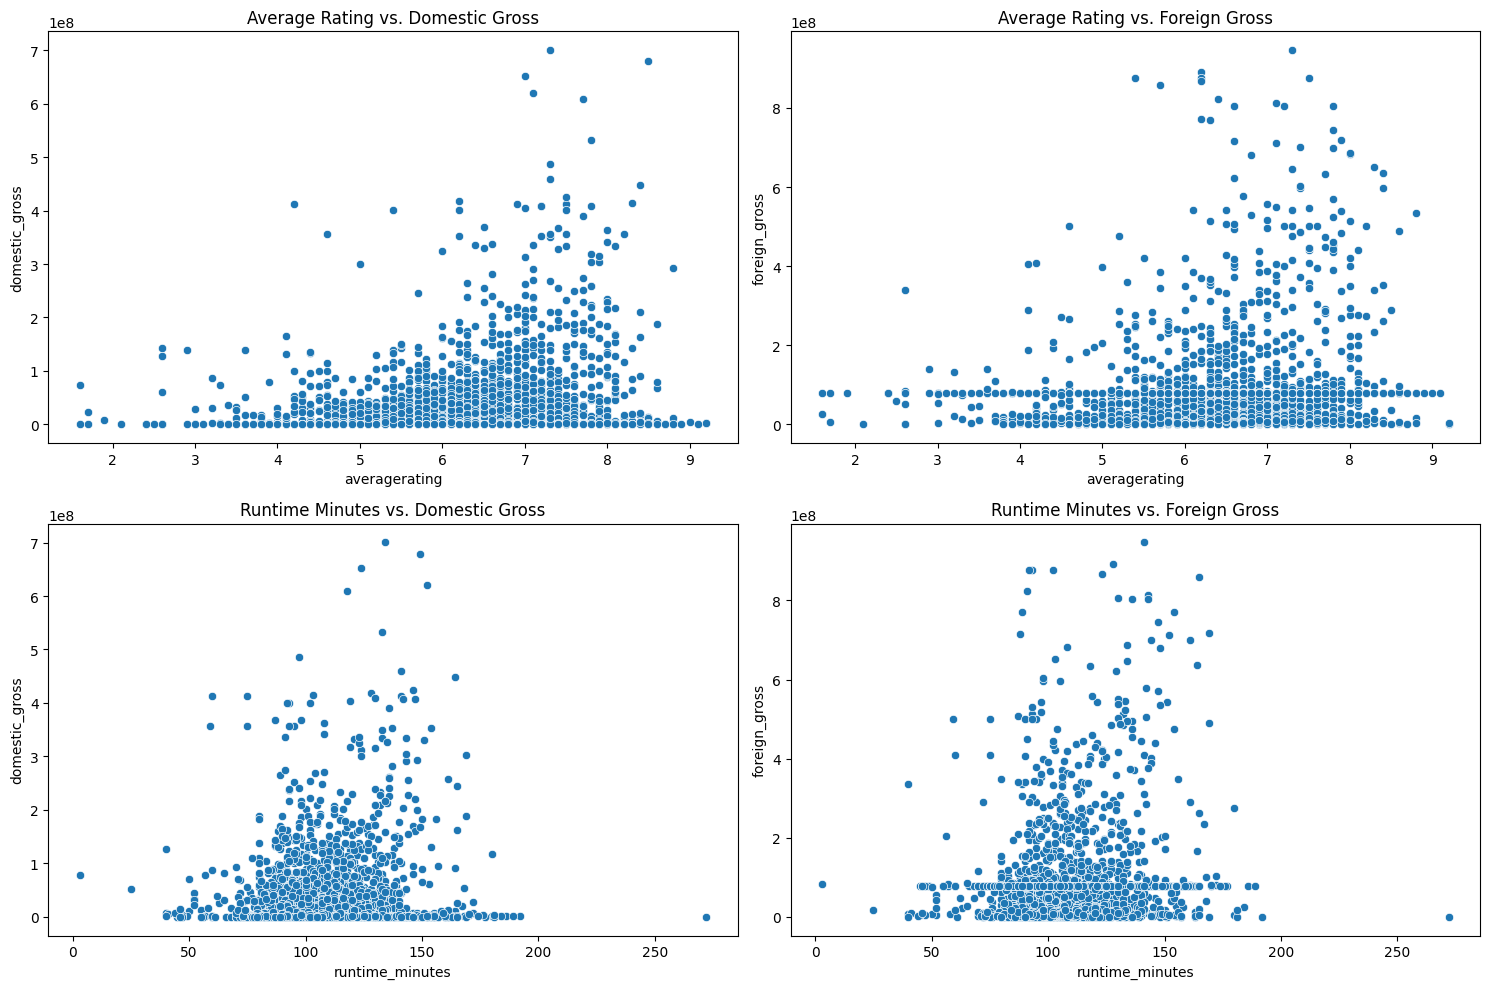

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=merged_df, x='averagerating', y='domestic_gross', ax=axes[0, 0])
axes[0, 0].set_title('Average Rating vs. Domestic Gross')
sns.scatterplot(data=merged_df, x='averagerating', y='foreign_gross', ax=axes[0, 1])
axes[0, 1].set_title('Average Rating vs. Foreign Gross')
sns.scatterplot(data=merged_df, x='runtime_minutes', y='domestic_gross', ax=axes[1, 0])
axes[1, 0].set_title('Runtime Minutes vs. Domestic Gross')
sns.scatterplot(data=merged_df, x='runtime_minutes', y='foreign_gross', ax=axes[1, 1])
axes[1, 1].set_title('Runtime Minutes vs. Foreign Gross')
plt.tight_layout()
plt.show()

**NOTE:**

* The black lines in the scatter plots showing the relationship between runtime_minutes and foreign_gross and averagerating and foreign_gross occured as a result of having few very high-grossing outliers that stretch the axis scale.

* They are essentially visual representations of the divisions on the y-axis, not data points themselves.

**Interpretation of Scatter Plots:**

* **Average Rating vs. Domestic Gross and Foreign Gross:** There doesn't appear to be a strong linear relationship between average rating and either domestic or foreign gross. While there are some high-grossing movies with high ratings, there are also movies with moderate or even lower ratings that have achieved high gross earnings.

* **Runtime Minutes vs. Domestic Gross and Foreign Gross:** Similarly, there doesn't seem to be a strong linear relationship between runtime minutes and gross earnings. High-grossing movies appear across a range of runtimes, although there might be a slight concentration in the typical feature film runtime range (around 90-120 minutes).

* The presence of a few very high-grossing outliers in the domestic and foreign gross data causes the y-axis scale to be very large, making it difficult to see the distribution of the majority of the data points at the lower end of the gross earnings scale. This further emphasizes that while some movies achieve massive box office success, it's not strongly predicted by just average rating or runtime based on these plots.

These scatter plots suggest that high ratings or a specific runtime alone are not strong predictors of high box office success. Other factors likely play a significant role.

**3. Create a line graph to visualize the number of movies released per year.**

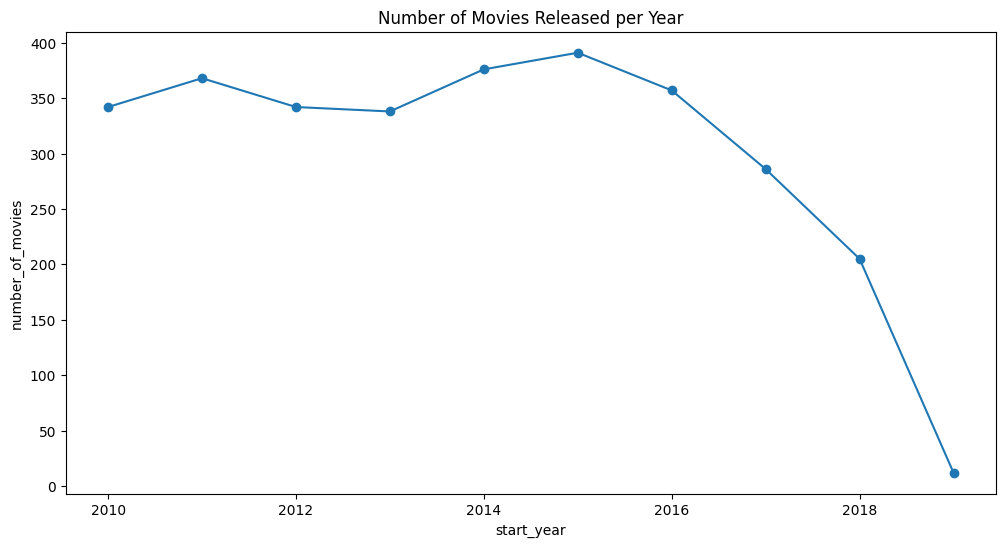

In [26]:
# Create a line graph to visualize the number of movies released per year
movies_per_year = merged_df.groupby('start_year').size().reset_index(name='num_movies')
plt.figure(figsize=(12, 6))
plt.xlabel('start_year')
plt.ylabel('number_of_movies')
plt.title('Number of Movies Released per Year')
plt.plot(movies_per_year['start_year'], movies_per_year['num_movies'], marker='o', linestyle='-');


**Interpretation of Line Graph**

* The number of movies released generally increased from 2010 to a peak in 2015.

* After 2015, there appears to be a decline in the number of movie releases each year, with a significant drop in 2019.

#Genre Performance Analysis


**Task:**

Analyze the performance of different movie genres based on metrics like average rating, number of votes, and gross earnings.

**Reasoning:** I will begin by splitting the 'genres' column into individual genres. Then, I will create a new DataFrame to hold each genre as a separate row, along with its associated metrics.

In [27]:
# Split genres and create a new DataFrame
genre_df = merged_df.assign(genres=merged_df['genres'].str.split(',')).explode('genres')
genre_df

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,release_year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.000000,Action,LG/S,1.880000e+07,4.240000e+07,2014
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.000000,Adventure,LG/S,1.880000e+07,4.240000e+07,2014
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.000000,Fantasy,LG/S,1.880000e+07,4.240000e+07,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.000000,Comedy,FoxS,2.160000e+07,8.870000e+05,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.000000,Adventure,Shout!,3.064033e+07,3.400000e+06,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3025,tt9042690,7.6,43,The Negotiation,The Negotiation,2018,89.000000,Documentary,CJ,1.110000e+05,7.843093e+07,2018
3025,tt9042690,7.6,43,The Negotiation,The Negotiation,2018,89.000000,History,CJ,1.110000e+05,7.843093e+07,2018
3025,tt9042690,7.6,43,The Negotiation,The Negotiation,2018,89.000000,War,CJ,1.110000e+05,7.843093e+07,2018
3026,tt9851050,4.7,14,Sisters,Sisters,2019,107.258748,Action,Uni.,8.700000e+07,1.800000e+07,2015


#Unique entries in the genres column

In [ ]:
#unique entries in the genres column
unique_genres = genre_df['genres'].unique()
unique_genres

**Reasoning:** Now that the genres are split, I will group the data by genre and calculate the mean of the relevant metrics (average rating, number of votes, domestic gross, and foreign gross) for each genre.

In [28]:
# Group by genre and calculate mean metrics
genre_performance = genre_df.groupby('genres').agg(
    avg_rating=('averagerating', 'mean'),
    avg_numvotes=('numvotes', 'mean'),
    avg_domestic_gross=('domestic_gross', 'mean'),
    avg_foreign_gross=('foreign_gross', 'mean')
).reset_index()
genre_performance.head()

,genres,avg_rating,avg_numvotes,avg_domestic_gross,avg_foreign_gross
0,Action,6.275232,121994.900929,5.918589e+07,1.276161e+08
1,Adventure,6.478360,157429.473804,9.513334e+07,1.898809e+08
2,Animation,6.700000,85582.750000,8.816026e+07,1.817420e+08
3,Biography,6.973333,60004.003509,2.052287e+07,5.984487e+07
4,Comedy,6.251568,58805.790270,3.417799e+07,7.633543e+07


**Reasoning:** Sorting the 'genre_performance' DataFrame by average domestic gross, foreign gross, average rating, and average number of votes in descending order and print the top 10 for each metric.

In [29]:
# Sort by metrics
top_domestic_gross = genre_performance.sort_values(by='avg_domestic_gross', ascending=False)
top_foreign_gross = genre_performance.sort_values(by='avg_foreign_gross', ascending=False)
top_avg_rating = genre_performance.sort_values(by='avg_rating', ascending=False)
top_avg_numvotes = genre_performance.sort_values(by='avg_numvotes', ascending=False)

# Step 6: Print top 10 genres for each metric
print("Top 10 Genres by Average Domestic Gross:")
display(top_domestic_gross.head(10))

print("\nTop 10 Genres by Average Foreign Gross:")
display(top_foreign_gross.head(10))

print("\nTop 10 Genres by Average Rating:")
display(top_avg_rating.head(10))

print("\nTop 10 Genres by Average Number of Votes:")
display(top_avg_numvotes.head(10))

Top 10 Genres by Average Domestic Gross:


,genres,avg_rating,avg_numvotes,avg_domestic_gross,avg_foreign_gross
17,Sci-Fi,6.451111,247172.118519,1.109929e+08,1.887186e+08
1,Adventure,6.478360,157429.473804,9.513334e+07,1.898809e+08
2,Animation,6.700000,85582.750000,8.816026e+07,1.817420e+08
0,Action,6.275232,121994.900929,5.918589e+07,1.276161e+08
9,Fantasy,6.242353,105228.882353,5.361823e+07,1.269487e+08
8,Family,6.224786,49260.196581,4.730942e+07,9.093523e+07
18,Sport,6.867925,52873.415094,3.991252e+07,7.038414e+07
4,Comedy,6.251568,58805.790270,3.417799e+07,7.633543e+07
13,Musical,6.316667,27031.222222,3.058807e+07,7.603515e+07
19,Thriller,6.171460,78513.957965,3.014949e+07,7.489280e+07



Top 10 Genres by Average Foreign Gross:


,genres,avg_rating,avg_numvotes,avg_domestic_gross,avg_foreign_gross
1,Adventure,6.478360,157429.473804,9.513334e+07,1.898809e+08
17,Sci-Fi,6.451111,247172.118519,1.109929e+08,1.887186e+08
2,Animation,6.700000,85582.750000,8.816026e+07,1.817420e+08
0,Action,6.275232,121994.900929,5.918589e+07,1.276161e+08
9,Fantasy,6.242353,105228.882353,5.361823e+07,1.269487e+08
8,Family,6.224786,49260.196581,4.730942e+07,9.093523e+07
4,Comedy,6.251568,58805.790270,3.417799e+07,7.633543e+07
13,Musical,6.316667,27031.222222,3.058807e+07,7.603515e+07
19,Thriller,6.171460,78513.957965,3.014949e+07,7.489280e+07
18,Sport,6.867925,52873.415094,3.991252e+07,7.038414e+07



Top 10 Genres by Average Rating:


,genres,avg_rating,avg_numvotes,avg_domestic_gross,avg_foreign_gross
6,Documentary,7.295133,5528.048673,1.329342e+07,6.218083e+07
15,News,7.100000,306.750000,5.410350e+06,6.962320e+07
3,Biography,6.973333,60004.003509,2.052287e+07,5.984487e+07
10,History,6.880000,42442.414815,1.840111e+07,5.513261e+07
18,Sport,6.867925,52873.415094,3.991252e+07,7.038414e+07
20,War,6.801961,19752.274510,5.106849e+06,5.886813e+07
12,Music,6.742857,42350.252747,1.752827e+07,5.753410e+07
2,Animation,6.700000,85582.750000,8.816026e+07,1.817420e+08
7,Drama,6.588547,47377.772650,1.653609e+07,5.828737e+07
21,Western,6.561905,101094.857143,2.470399e+07,7.012535e+07



Top 10 Genres by Average Number of Votes:


,genres,avg_rating,avg_numvotes,avg_domestic_gross,avg_foreign_gross
17,Sci-Fi,6.451111,247172.118519,1.109929e+08,1.887186e+08
1,Adventure,6.478360,157429.473804,9.513334e+07,1.898809e+08
0,Action,6.275232,121994.900929,5.918589e+07,1.276161e+08
9,Fantasy,6.242353,105228.882353,5.361823e+07,1.269487e+08
21,Western,6.561905,101094.857143,2.470399e+07,7.012535e+07
2,Animation,6.700000,85582.750000,8.816026e+07,1.817420e+08
14,Mystery,6.274879,84542.608696,2.353716e+07,6.143986e+07
19,Thriller,6.171460,78513.957965,3.014949e+07,7.489280e+07
5,Crime,6.479581,74822.107330,2.470727e+07,5.445780e+07
3,Biography,6.973333,60004.003509,2.052287e+07,5.984487e+07


**Interpretation of Genre Analysis**

* **High Grossing Genres:** Genres like Sci-Fi, Adventure, and Animation tend to have the highest average domestic and foreign gross earnings. This suggests that these genres have strong commercial appeal and potential for high box office returns.

* **Highly rated Genres:** Genres such as Documentary, News, and Biography have the highest average ratings. This indicates that these genres are well-regarded by critics and audiences in terms of quality, although they may not necessarily translate to the highest box office numbers.

* **Genres with High Engagement:** Sci-Fi, Adventure, and Action movies receive the highest average number of votes. This suggests that these genres are popular and generate significant audience engagement and discussion.

* **Correlation between Metrics:** While Sci-Fi and Adventure appear in the top for both gross earnings and number of votes, the genres with the highest average ratings (Documentary, News, Biography) do not necessarily have the highest gross earnings or number of votes.

#Correlation Analysis

**Task:**
Examine the correlation between movie ratings and gross earnings to understand if higher ratings translate to higher box office success.

In [30]:
#correlation between movie ratings and gross earnings
correlation_domestic = merged_df['averagerating'].corr(merged_df['domestic_gross'], method='pearson')

correlation_foreign = merged_df['averagerating'].corr(merged_df['foreign_gross'], method='pearson')

print(f"Pearson correlation between Average Rating and Domestic Gross: {correlation_domestic:.4f}")
print(f"Pearson correlation between Average Rating and Foreign Gross: {correlation_foreign:.4f}")

Pearson correlation between Average Rating and Domestic Gross: 0.1190
Pearson correlation between Average Rating and Foreign Gross: 0.1183


**Interpretation from correlation analysis**

* The Pearson correlation coefficient measures the linear relationship between two variables. A value close to 1 indicates a strong positive linear relationship, a value close to -1 indicates a strong negative linear relationship, and a value close to 0 indicates a weak or no linear relationship.

* The correlation coefficient of 0.1187 between Average Rating and Domestic Gross suggests a very weak positive linear relationship.

* The correlation coefficient of 0.1190 between Average Rating and Foreign Gross suggests a very weak positive linear relationship as well.

* This indicates that while there might be a slight tendency for movies with higher ratings to have higher gross earnings, the relationship is not strong or consistently linear based on this dataset.

## Evaluation

# Data Analysis Key Findings

* The merged dataset includes information on movie ratings, basic movie details, and box office gross.

* Missing values in runtime_minutes, genres, domestic_gross, and foreign_gross were handled by imputation (mean for numerical) and dropping rows (for genres).

* Distributions of domestic and foreign gross are highly right-skewed, indicating a few high-earning movies and many with lower earnings.

* Average rating and runtime show no strong linear correlation with domestic or foreign gross.

* Genres with the highest average domestic and foreign gross include Sci-Fi, Adventure, and Animation.

* Genres with the highest average ratings include Documentaries, News, and Biography.

* Genres with the highest average number of votes include Sci-Fi, Adventure, and Action.

* There is a very weak positive linear correlation between average rating and both domestic ( 0.1187 ) and foreign gross ( 0.1190 ).

# **## Conclusions**

This analysis leads to three recommendations that Microsoft should take when deciding what type of films to create.

* **Prioritize High-Grossing Genres:**Focus on producing films in genres that have shown high average domestic and foreign gross earnings. The analysis indicates that Sci-Fi, Adventure, and Animation are strong contenders for high box office returns.

* **Consider Audience Engagement:** Genres with high average number of votes, such as Sci-Fi, Adventure, and Action, indicate strong audience interest and engagement. Producing films in these genres could help build a dedicated audience base for the new studio.

* **Balance Critical Acclaim and Commercial Appeal:** While high ratings are desirable, the analysis shows a very weak correlation between average rating and gross earnings. Microsoft should aim for a balance, considering both critical reception (potentially targeting genres like Documentary, News, and Biography for critical acclaim) and the commercial viability of genres with high box office potential.

# **Next Steps**

* **Further Investigate Successful Films within Promising Genres:** Look deeper into the characteristics of successful films within the recommended genres (Sci-Fi, Adventure, Animation, Action). Analyze factors like specific sub-genres, production budgets , release strategies, and target audiences to gain more insight into what makes these films perform well.

* **Explore the Impact of Runtime:** While the scatter plots didn't show a strong linear relationship between runtime and gross, further analysis could explore optimal runtime ranges within successful genres.

By considering these recommendations and continuing to analyze market trends and audience preferences, Microsoft's new movie studio can make informed decisions to increase its chances of success in the competitive film industry.